In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"E:\apple\apple-stockprice-2014-2024.csv")
df = df.dropna()

In [3]:
training_set = np.array(df.iloc[:, 1 : 2].values)
# training_set["volume"] = df.iloc[:, -1]
training_set

array([[ 27.7823658 ],
       [ 27.77090836],
       [ 27.72134399],
       ...,
       [142.1300049 ],
       [142.9799957 ],
       [142.8300018 ]])

In [4]:
training_set.shape

(2514, 1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
# training_set.reshape(-1, 1)
scaled_train = sc.fit_transform(training_set)
len(scaled_train)

2514

In [6]:
train = []
test = []

for i in range(20, len(scaled_train)):
    train.append(scaled_train[i-20 : i, 0])
    test.append(scaled_train[i, 0])

len(train)

2494

In [7]:
train, test = np.array(train), np.array(test)
train = np.reshape(train, (train.shape[0], train.shape[1], 1))
train.shape

(2494, 20, 1)

In [8]:
train.shape

(2494, 20, 1)

In [9]:
model = tf.keras.models.Sequential()

In [10]:
model.add(tf.keras.layers.LSTM(
    units = 50,
    return_sequences=True,
    input_shape = (train.shape[1], train.shape[2])
))

model.add(tf.keras.layers.Dropout(
    rate = 0.2
))

In [11]:
model.add(tf.keras.layers.LSTM(
    units = 50,
    return_sequences=True
))

model.add(tf.keras.layers.Dropout(
    rate = 0.2
))

In [12]:
model.add(tf.keras.layers.LSTM(
    units = 50,
    return_sequences=True
))

model.add(tf.keras.layers.Dropout(
    rate = 0.2
))

In [13]:
model.add(tf.keras.layers.LSTM(
    units = 50,
    return_sequences=False
))

model.add(tf.keras.layers.Dropout(
    rate = 0.2
))

In [14]:
model.add(tf.keras.layers.Dense(
    units = 1
))

In [15]:
model.compile(
    optimizer ='adam',
    loss ="mean_squared_error"
)

In [16]:
model.fit(
    x = train,
    y = test,
    batch_size = 32,
    epochs = 20
)

Epoch 1/20

78/78 [==============================] - 6s 21ms/step - loss: 0.0156
Epoch 2/20
78/78 [==============================] - 1s 18ms/step - loss: 0.0034
Epoch 3/20
78/78 [==============================] - 2s 21ms/step - loss: 0.0030
Epoch 4/20
78/78 [==============================] - 1s 19ms/step - loss: 0.0028
Epoch 5/20
78/78 [==============================] - 1s 18ms/step - loss: 0.0030
Epoch 6/20
78/78 [==============================] - 2s 19ms/step - loss: 0.0025
Epoch 7/20
78/78 [==============================] - 1s 18ms/step - loss: 0.0026
Epoch 8/20
78/78 [==============================] - 2s 22ms/step - loss: 0.0028
Epoch 9/20
78/78 [==============================] - 1s 18ms/step - loss: 0.0023
Epoch 10/20
78/78 [==============================] - 1s 19ms/step - loss: 0.0023
Epoch 11/20
78/78 [==============================] - 2s 20ms/step - loss: 0.0022
Epoch 12/20
78/78 [==============================] - 1s 18ms/step - loss: 0.0022
Epoch 13/20
78/78 [=================

In [17]:
df2 = pd.read_csv(r"E:\test.csv")
df2.head()

,12/28/2023,141.850006103515,142.27000427246,140.828002929687,141.279998779296,141.279998779296.1,12192500
0,12/29/2023,140.679993,141.434998,139.899994,140.929993,140.929993,14872700
1,1/2/2024,139.600006,140.615005,137.740005,139.559998,139.559998,20071900
2,1/3/2024,138.600006,141.089996,138.429993,140.360001,140.360001,18974300
3,1/4/2024,139.850006,140.634995,138.009995,138.039993,138.039993,18253300
4,1/5/2024,138.352005,138.809998,136.850006,137.389999,137.389999,15433200


In [18]:
real = df2.iloc[: , 1:2, ].values
real

array([[140.67999268],
       [139.6000061 ],
       [138.6000061 ],
       [139.8500061 ],
       [138.352005  ],
       [138.        ],
       [140.05999756],
       [142.52000427],
       [144.89500427],
       [144.33999634],
       [143.42999268],
       [142.91000366],
       [143.44000244],
       [146.30499268],
       [148.71000671],
       [147.72000122],
       [150.28999329],
       [151.74000549],
       [152.86999512]])

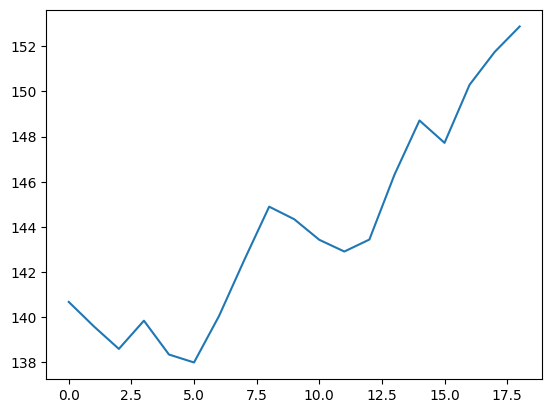

In [19]:
import matplotlib.pyplot as plt
plt.plot(real)

In [20]:
last60 = training_set[2454 : 2534]
val = np.concatenate((last60, real))

In [21]:
val1 = sc.transform(val)

In [22]:
pre = []

for i in range(20, 79):
    pre.append(val[i - 20 : i, 0])
pre = np.array(pre)
pre.shape

(59, 20)

In [23]:
pred = model.predict(pre)

2/2 [==============================] - 1s 15ms/step


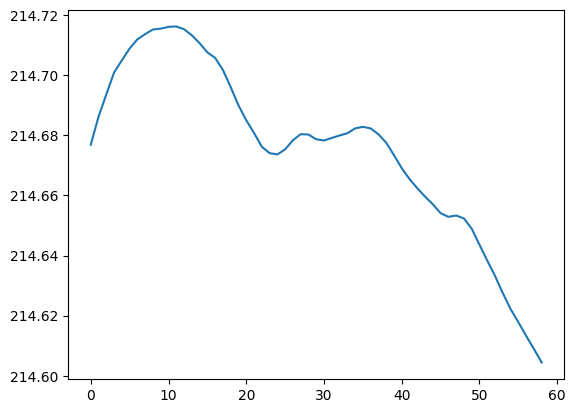

In [24]:
plt.plot(sc.inverse_transform(pred))